In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D,GlobalAvgPool2D, Dense, Dropout, Flatten

# Neural Networks for Images

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train = tf.expand_dims(X_train, -1).numpy()
X_test = tf.expand_dims(X_test, -1).numpy()

In [6]:
INPUT_SHAPE = X_train.shape[1:]
NUM_CLASSES = len(set(y_train))

In [7]:
INPUT_SHAPE, NUM_CLASSES

((28, 28, 1), 10)

In [16]:
tf.keras.backend.clear_session()

In [17]:
model = Sequential([
    Input(INPUT_SHAPE),
    Conv2D(32, 3, padding = 'same', strides = 2, activation = 'relu'),
    Conv2D(32, 3, padding = 'same', activation = 'relu'),
    MaxPool2D(),
    Conv2D(16, 3, padding = 'same', strides = 2, activation = 'relu'),
    Conv2D(16, 3, padding = 'same', activation = 'relu'),

    # Flatten(),
    GlobalAvgPool2D(),

    Dense(NUM_CLASSES, activation = 'relu'),
    Dropout(0.05),
    Dense(NUM_CLASSES, activation = 'softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 global_average_pooling2d (  (None, 16)                0         
 GlobalAveragePooling2D)                                

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.1)

Epoch 1/20
1688/1688 [==============================] - 12s 6ms/step - loss: 0.5027 - accuracy: 0.8384 - val_loss: 0.1526 - val_accuracy: 0.9598
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1703 - accuracy: 0.9493 - val_loss: 0.0862 - val_accuracy: 0.9757
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1270 - accuracy: 0.9630 - val_loss: 0.0740 - val_accuracy: 0.9810
Epoch 4/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1063 - accuracy: 0.9685 - val_loss: 0.0782 - val_accuracy: 0.9798
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0927 - accuracy: 0.9720 - val_loss: 0.0606 - val_accuracy: 0.9853
Epoch 6/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0819 - accuracy: 0.9756 - val_loss: 0.0701 - val_accuracy: 0.9798
Epoch 7/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0736 - accuracy: 0.9777 - val_loss: 0.0738 - val_accura

In [21]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9829


[0.07040242850780487, 0.9829000234603882]

In [22]:
model.save_weights('model_global_pooling.h5')

In [23]:
model.layers

In [25]:
len(model.layers[0].weights)

2

In [26]:
model.layers[0].kernel.shape

TensorShape([3, 3, 1, 32])

In [27]:
model.layers[0].kernel[:, :, :, 0].shape

TensorShape([3, 3, 1])

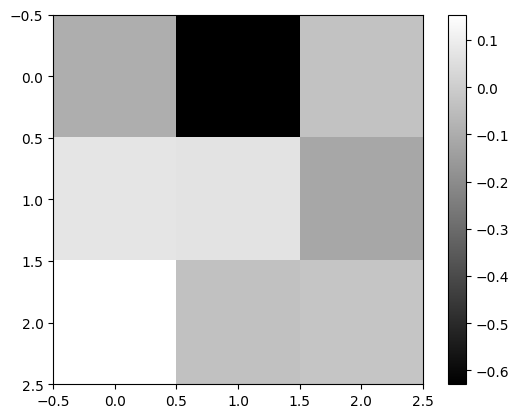

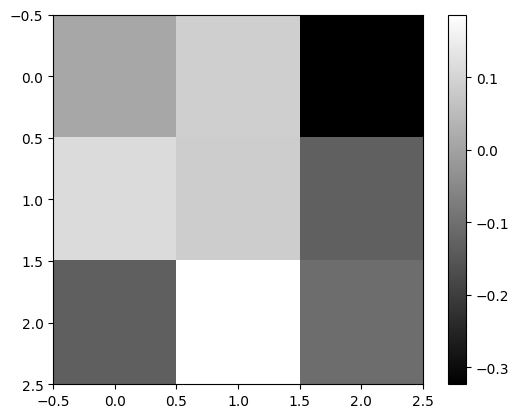

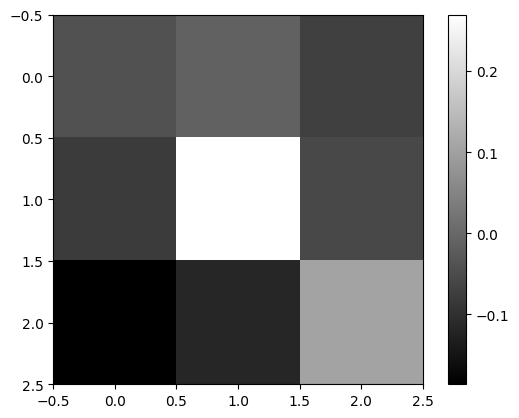

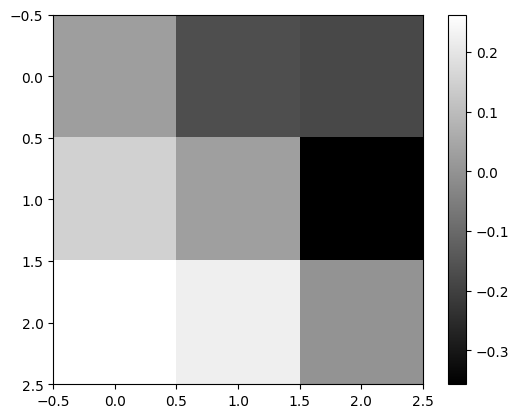

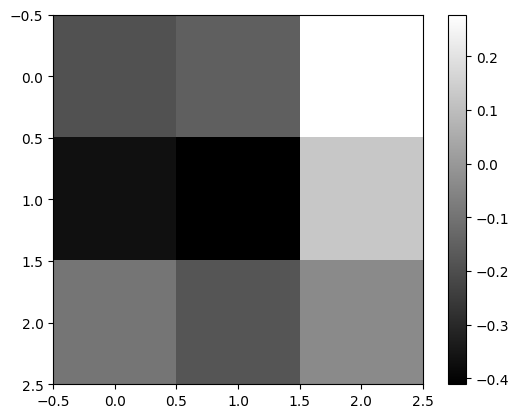

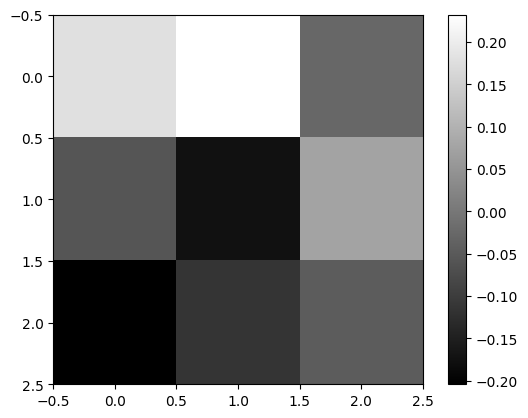

In [30]:
for i in range(6):
  plt.imshow(model.layers[0].kernel[:, :, :, i], cmap = 'gray')
  plt.colorbar()
  plt.show()